https://santiagof.medium.com/model-interpretability-making-your-model-confess-feature-importance-34993e001d99

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('WC-stats.csv')

In [3]:
df.head()

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
0,0.423077,0.146923,-0.136154,-0.030000,0.429231,0.037692,0.244615,-0.220000,0.216154,0.270000,-0.076923,-0.097692,-0.020000,-0.224615,0.100769,-0.124615,2
1,0.216923,0.348462,0.031538,0.158462,0.835385,0.626923,0.270000,0.266923,1.143846,0.834615,-0.059231,-0.134615,0.196923,-0.016923,0.033846,0.146923,1
2,0.113846,0.392308,0.599231,0.513846,0.833077,0.405385,0.521538,1.139231,1.109231,0.859231,0.084615,0.103077,0.683846,0.213846,0.353846,0.786923,9
3,0.479231,0.609231,0.227692,0.450769,0.770769,0.042308,0.337692,0.927692,0.506923,1.015385,0.020769,0.381538,0.038462,0.039231,0.022308,0.692308,5
4,0.877692,0.773846,0.428462,0.659231,0.754615,0.335385,0.023077,0.638462,0.493846,0.637692,-0.117692,-0.033846,0.572308,-0.016154,-0.096923,0.890769,5


In [4]:
df.shape

(238, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   goals_z          238 non-null    float64
 1   xg_z             238 non-null    float64
 2   crosses_z        238 non-null    float64
 3   boxtouches_z     238 non-null    float64
 4   passes_z         238 non-null    float64
 5   progpasses_z     238 non-null    float64
 6   takeons_z        238 non-null    float64
 7   progruns_z       238 non-null    float64
 8   tackles_z        238 non-null    float64
 9   interceptions_z  238 non-null    float64
 10  clearances_z     238 non-null    float64
 11  blocks_z         238 non-null    float64
 12  aerials_z        238 non-null    float64
 13  fouls_z          238 non-null    float64
 14  fouled_z         238 non-null    float64
 15  nsxg_z           238 non-null    float64
 16  results          238 non-null    int64  
dtypes: float64(16), 

In [6]:
df.corr()

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
goals_z,1.000000,0.622869,0.078594,0.347687,0.186192,0.050513,0.266519,0.187630,0.216870,0.169602,-0.178897,0.022937,0.045770,-0.094834,0.057350,0.373312,-0.597229
xg_z,0.622869,1.000000,0.376119,0.659696,0.321120,0.121984,0.357251,0.377608,0.362212,0.278534,-0.380202,0.030171,0.033487,-0.036656,0.170568,0.641896,-0.292449
crosses_z,0.078594,0.376119,1.000000,0.642130,0.256452,0.276849,0.139513,0.259775,0.244300,0.231632,-0.251982,0.010695,0.233689,0.064459,0.193971,0.673878,0.028692
boxtouches_z,0.347687,0.659696,0.642130,1.000000,0.372202,0.245929,0.236681,0.380923,0.392027,0.285272,-0.419246,0.097848,0.231686,0.025010,0.181071,0.860980,-0.187746
passes_z,0.186192,0.321120,0.256452,0.372202,1.000000,0.751306,0.383811,0.575545,0.737638,0.743981,-0.113066,0.382781,0.000264,0.071775,0.295560,0.484094,-0.133468
progpasses_z,0.050513,0.121984,0.276849,0.245929,0.751306,1.000000,0.164441,0.307472,0.515722,0.561366,-0.030842,0.352512,0.030705,0.215038,0.173777,0.359863,-0.029293
takeons_z,0.266519,0.357251,0.139513,0.236681,0.383811,0.164441,1.000000,0.551726,0.376918,0.374410,-0.085508,0.158833,-0.104707,0.127382,0.338699,0.394653,-0.164389
progruns_z,0.187630,0.377608,0.259775,0.380923,0.575545,0.307472,0.551726,1.000000,0.511843,0.403296,-0.069473,0.264128,-0.069694,0.039159,0.254810,0.471431,-0.190845
tackles_z,0.216870,0.362212,0.244300,0.392027,0.737638,0.515722,0.376918,0.511843,1.000000,0.694638,-0.197803,0.260157,0.053300,0.025422,0.296792,0.484239,-0.173461
interceptions_z,0.169602,0.278534,0.231632,0.285272,0.743981,0.561366,0.374410,0.403296,0.694638,1.000000,-0.110541,0.305133,0.025863,0.142297,0.309954,0.412275,-0.103971


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
goals_z,238.0,0.143819,0.279870,-0.410000,-0.066154,0.132308,0.324423,0.881538
xg_z,238.0,0.159644,0.263774,-0.466923,-0.028077,0.156154,0.321346,1.015385
crosses_z,238.0,0.084247,0.245652,-0.493846,-0.090000,0.040769,0.257500,0.853846
boxtouches_z,238.0,0.160856,0.285296,-0.634615,-0.032308,0.147308,0.309615,1.153077
passes_z,238.0,0.060469,0.357300,-0.781538,-0.184231,0.038077,0.290192,1.410769
progpasses_z,238.0,-0.014619,0.253048,-0.649231,-0.191538,-0.029615,0.112500,0.873846
takeons_z,238.0,0.107407,0.298606,-0.473077,-0.118077,0.090000,0.288462,1.100769
progruns_z,238.0,0.095936,0.354853,-0.568462,-0.147500,0.043846,0.278269,1.432308
tackles_z,238.0,0.066127,0.374111,-0.722308,-0.185769,0.021538,0.283077,1.146154
interceptions_z,238.0,0.062545,0.392934,-0.649231,-0.219615,0.004231,0.284038,1.216154


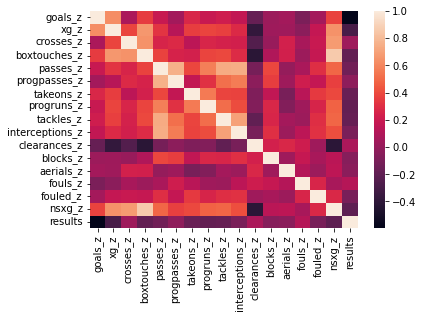

In [8]:
sns.heatmap(df.corr());

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_5268/2528632801.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


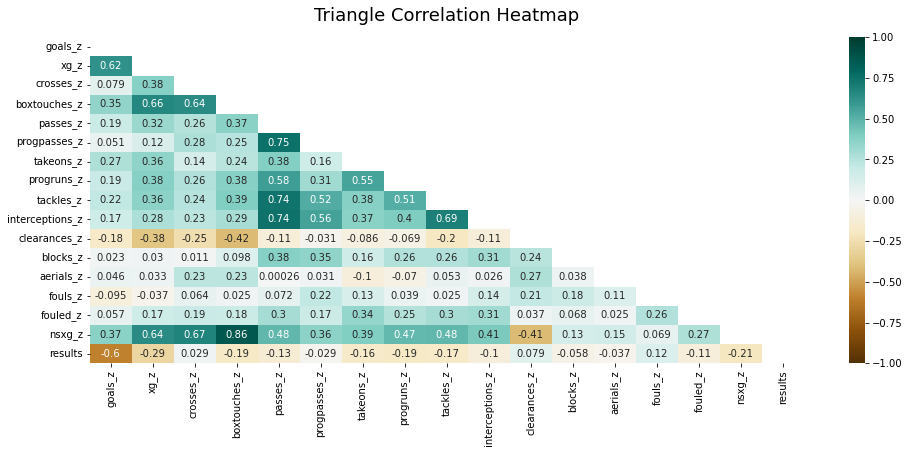

In [9]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

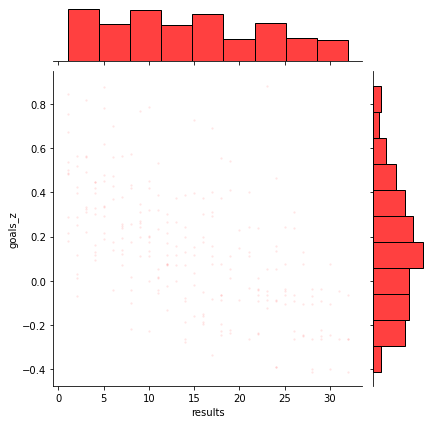

In [10]:
sns.jointplot(x=df['results'],y=df['goals_z'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

In [11]:
y = df['results']


In [12]:
X = df.drop(columns=['results'])

In [13]:
X.head()

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,0.423077,0.146923,-0.136154,-0.030000,0.429231,0.037692,0.244615,-0.220000,0.216154,0.270000,-0.076923,-0.097692,-0.020000,-0.224615,0.100769,-0.124615
1,0.216923,0.348462,0.031538,0.158462,0.835385,0.626923,0.270000,0.266923,1.143846,0.834615,-0.059231,-0.134615,0.196923,-0.016923,0.033846,0.146923
2,0.113846,0.392308,0.599231,0.513846,0.833077,0.405385,0.521538,1.139231,1.109231,0.859231,0.084615,0.103077,0.683846,0.213846,0.353846,0.786923
3,0.479231,0.609231,0.227692,0.450769,0.770769,0.042308,0.337692,0.927692,0.506923,1.015385,0.020769,0.381538,0.038462,0.039231,0.022308,0.692308
4,0.877692,0.773846,0.428462,0.659231,0.754615,0.335385,0.023077,0.638462,0.493846,0.637692,-0.117692,-0.033846,0.572308,-0.016154,-0.096923,0.890769


In [14]:
import matplotlib.pyplot as plt
from scipy import stats


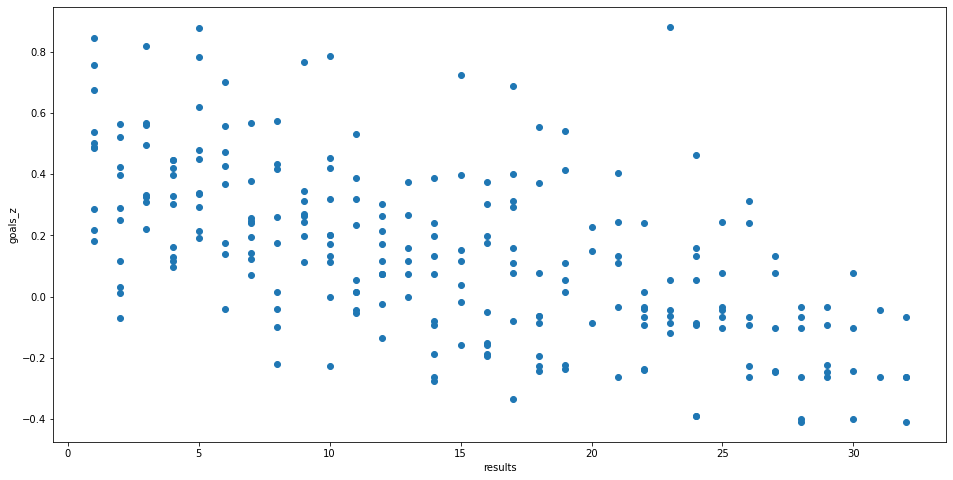

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['results'], df['goals_z'])
ax.set_xlabel('results')
ax.set_ylabel('goals_z')
plt.show()

In [16]:
z = np.abs(stats.zscore(df))
print(z)

      goals_z      xg_z  crosses_z  boxtouches_z  passes_z  progpasses_z  \
0    0.999916  0.048329   0.899101      0.670385  1.034253      0.207161   
1    0.261758  0.717339   0.215020      0.008410  2.173378      2.540605   
2    0.107321  0.883915   2.100813      1.239885  2.166906      1.663279   
3    1.200982  1.708031   0.585166      1.018326  1.992154      0.225439   
4    2.627721  2.333423   1.404180      1.750551  1.946847      1.386068   
..        ...       ...        ...           ...       ...           ...   
233  0.922795  0.612132   0.302747      0.084065  1.079559      2.147636   
234  0.038463  0.042484   0.218158      1.229686  0.067723      0.003061   
235  1.302697  1.462768   0.167814      0.030026  0.965688      0.466064   
236  1.184261  1.304959   0.575752      0.554202  0.025047      0.155375   
237  0.432526  0.892682   0.729650      0.199639  0.645915      0.304642   

     takeons_z  progruns_z  tackles_z  interceptions_z  clearances_z  \
0     0.460463 

<AxesSubplot:>

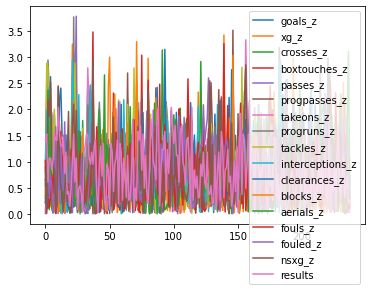

In [17]:
z.plot()

<AxesSubplot:>

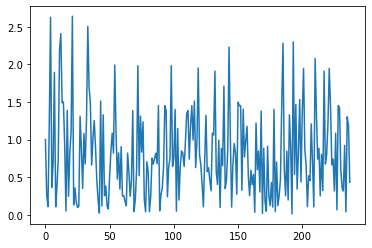

In [18]:
z.goals_z.plot()

In [19]:
z.describe().T

,count,mean,std,min,25%,50%,75%,max
goals_z,238.0,0.810210,0.587374,0.010920,0.329239,0.714747,1.207033,2.641493
xg_z,238.0,0.789552,0.614977,0.007197,0.300221,0.656078,1.144958,3.251056
crosses_z,238.0,0.806874,0.591969,0.007777,0.336481,0.710822,1.119544,3.139486
boxtouches_z,238.0,0.771259,0.637863,0.005099,0.267863,0.582572,1.108099,3.485195
passes_z,238.0,0.781137,0.625676,0.001315,0.323312,0.674434,1.105803,3.787138
progpasses_z,238.0,0.768617,0.641057,0.003031,0.269602,0.638179,1.149198,3.518457
takeons_z,238.0,0.797507,0.604581,0.008701,0.305430,0.703459,1.182638,3.333674
progruns_z,238.0,0.786049,0.619466,0.007132,0.328634,0.627328,1.161574,3.773927
tackles_z,238.0,0.790094,0.614277,0.006254,0.289536,0.648982,1.109611,2.893003
interceptions_z,238.0,0.794327,0.608771,0.002568,0.347914,0.662103,1.100447,2.942074


In [29]:
threshold = 2.2
print(np.where(z > 2.7))

(array([  1,   2,   2,  21,  21,  22,  22,  23,  24,  33,  37,  37,  37,
        50,  69,  71,  75,  80,  91,  93, 121, 139, 139, 145, 146, 146,
       146, 153, 156, 156, 156, 182, 182, 183, 183, 193, 214, 220, 221,
       221, 236]), array([ 8,  7,  8,  1,  9,  4,  7,  8,  4,  6,  3,  7, 15, 11,  8, 11,  3,
       11,  2, 10,  2, 11, 13, 10,  4,  5, 11,  8,  6, 14, 15,  5,  9,  4,
        9,  1,  7, 10,  3, 15, 12]))


In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

goals_z             0.390577
xg_z                0.349423
crosses_z           0.347500
boxtouches_z        0.341923
passes_z            0.474423
progpasses_z        0.304038
takeons_z           0.406538
progruns_z          0.425769
tackles_z           0.468846
interceptions_z     0.503654
clearances_z        0.312115
blocks_z            0.361731
aerials_z           0.388462
fouls_z             0.426731
fouled_z            0.358654
nsxg_z              0.363269
results            14.750000
dtype: float64


In [22]:
# print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

In [23]:
df.isnull().sum()

goals_z            0
xg_z               0
crosses_z          0
boxtouches_z       0
passes_z           0
progpasses_z       0
takeons_z          0
progruns_z         0
tackles_z          0
interceptions_z    0
clearances_z       0
blocks_z           0
aerials_z          0
fouls_z            0
fouled_z           0
nsxg_z             0
results            0
dtype: int64

In [104]:
df_z = df[(z < 2.25).all(axis=1)]

In [105]:
df_z.shape

(177, 17)

In [106]:
df.shape

(238, 17)

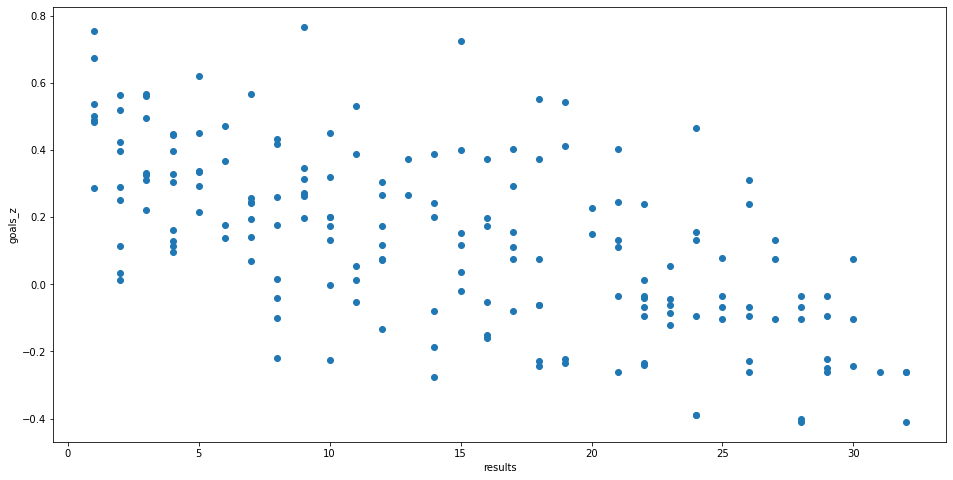

In [107]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_z['results'], df_z['goals_z'])
ax.set_xlabel('results')
ax.set_ylabel('goals_z')
plt.show()

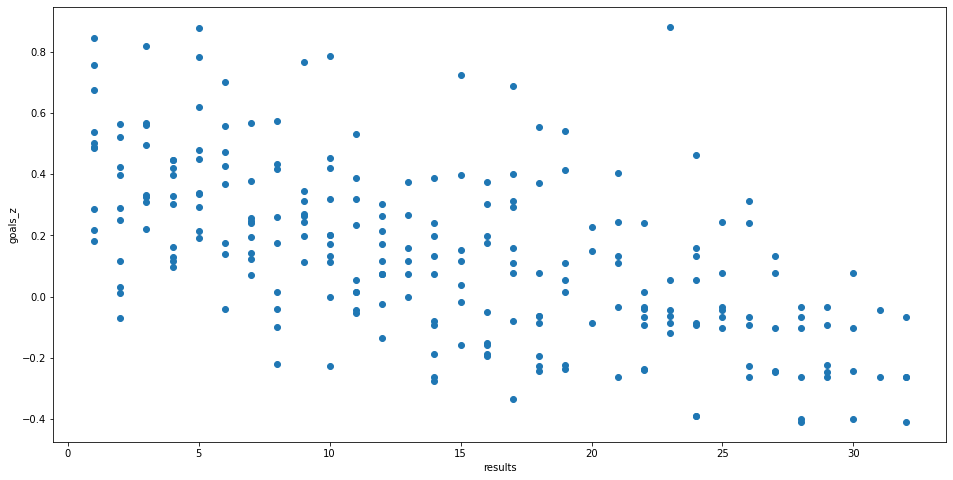

In [108]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['results'], df['goals_z'])
ax.set_xlabel('results')
ax.set_ylabel('goals_z')
plt.show()

# new csv

In [109]:
df_z.to_csv('./WC Data Models/wc-wo-outliers.csv', index=False)

In [77]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
y = df_z['results']

In [211]:
X = df_z.drop(columns=['results'])

In [212]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=1)

In [213]:
reg = LinearRegression().fit(X_train, y_train)

In [214]:
predictions = reg.predict(X_test)

In [332]:
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

print('LINEAR REGRESSION')
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))
print('MSE: '+str(mean_squared_error(y_test, predictions)))
print('MAE: '+str(mean_absolute_error(y_test, predictions)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, predictions)))

LINEAR REGRESSION
r2 score: 0.45812714082277384
RMSE : 6.746346591344607
MSE: 45.513192330547
MAE: 5.6049298574127615
MAPE: 0.608694879466424


# 46%

In [216]:
import eli5
from eli5.sklearn import PermutationImportance

In [217]:
perm = PermutationImportance(reg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are goals_z & passes_z 

Weight,Feature
0.9349 ± 0.1796,goals_z
0.1222 ± 0.1041,passes_z
0.0737 ± 0.1101,boxtouches_z
0.0288 ± 0.0474,progruns_z
0.0116 ± 0.0068,clearances_z
0.0108 ± 0.0308,tackles_z
0.0024 ± 0.0157,crosses_z
0.0020 ± 0.0018,interceptions_z
0.0018 ± 0.0253,fouled_z
0.0012 ± 0.0043,takeons_z


The previous table shows the feature importance of each of the columns. The weight column represents the importance of the feature measured as the MDA. The +/- sign represents the standard deviation of the importance calculated before. This value tries to measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles. Weight’s column then represents the mean of the error accumulated in the multiple shuffles instead of in a single trial.

In [218]:
importances = eli5.explain_weights_df(perm, feature_names=X_test.columns.tolist())

In [219]:
importances

,feature,weight,std
0,goals_z,0.934914,0.089776
1,passes_z,0.122191,0.052064
2,boxtouches_z,0.073670,0.055029
3,progruns_z,0.028777,0.023706
4,clearances_z,0.011562,0.003391
5,tackles_z,0.010752,0.015405
6,crosses_z,0.002439,0.007833
7,interceptions_z,0.001995,0.000885
8,fouled_z,0.001828,0.012629
9,takeons_z,0.001193,0.002133


<AxesSubplot:xlabel='feature', ylabel='weight'>

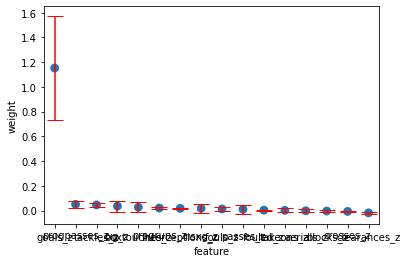

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.errorbar(x=importances['feature'],
    y=importances['weight'],
    yerr=importances['std'],
    ecolor='r', capsize=8, fmt='none',)
sns.pointplot(x='feature', 
    y='weight', 
    data=importances, 
    dodge=True, join=False, ci='none')

This graph is telling us the importance of each of the features in classifying something as present or past. 

## Ridge Regression


In [41]:
from sklearn.linear_model import Ridge

In [42]:
clf = Ridge(alpha=1.0)

In [43]:
clf.fit(X_train, y_train)

Ridge()

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print('RIDGE REGRESSION')
print('RMSE: '+str(np.sqrt(mean_squared_error(y_train,pred_train_rr))))
print('R Squared: '+str(r2_score(y_train, pred_train_rr)))
# print('MSE: '+str(mean_squared_error(y_test, pred_train_rr)))
# print('MAE: '+str(mean_absolute_error(y_test, pred_train_rr)))
print('MAPE: '+str(mean_absolute_percentage_error(y_train, pred_train_rr)))

RIDGE REGRESSION
RMSE: 6.645452818212983
R Squared: 0.5207879337372383
MAPE: 0.9405473114946074


In [46]:
pred_test_rr= rr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

6.546574410596934
0.4591748160801836


## 46%-57%

# Lasso

In [47]:
from sklearn import linear_model


In [48]:
clf = linear_model.Lasso(alpha=0.1)

In [49]:
clf.fit(X, y)

Lasso(alpha=0.1)

In [50]:
print(clf.coef_)

[-22.12892651   0.           0.          -0.           1.11803102
   0.          -0.          -0.          -0.04202932  -0.
  -0.           0.25686828  -0.           1.08267984  -0.
   0.        ]


In [51]:
print(clf.intercept_)

17.24337558499466


In [52]:
model_lasso = linear_model.Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)

print('LASSO REGRESSION')

print('RMSE: '+str(np.sqrt(mean_squared_error(y_train,pred_train_lasso))))
print('R Squared: '+str(r2_score(y_train, pred_train_lasso)))
print('MSE: '+str(mean_squared_error(y_test, predictions)))
print('MAE: '+str(mean_absolute_error(y_test, predictions)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, predictions)))

print('--------------------')
pred_test_lasso= model_lasso.predict(X_test)

print('RMSE: '+str(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))) 
print('R Squared: '+str(r2_score(y_test, pred_test_lasso)))
print('MSE: '+str(mean_squared_error(y_test, pred_test_lasso)))
print('MAE: '+str(mean_absolute_error(y_test, pred_test_lasso)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, pred_test_lasso)))

LASSO REGRESSION
RMSE: 6.654226955476154
R Squared: 0.5195216699254779
MSE: 42.88816264502233
MAE: 5.441647295277558
MAPE: 0.8581266877876318
--------------------
RMSE: 6.4986296685245195
R Squared: 0.4670674244494648
MSE: 42.232187568627104
MAE: 5.34439587548745
MAPE: 0.8234574915992052


## 47%-57%

## Elastic Net

In [53]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [55]:
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)

In [56]:
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

In [57]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [58]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

In [59]:
print('ELASTIC NET')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

ELASTIC NET
Test set evaluation:
_____________________________________
MAE: 5.176351828568661
MSE: 40.10564374896148
RMSE: 6.332901684769903
R2 Square 0.4939025125678309
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.825735023910361
MSE: 47.612001656327244
RMSE: 6.900145046035427
R2 Square 0.48335167350752983
__________________________________


In [60]:
print('MAPE: '+str(mean_absolute_percentage_error(y_test, test_pred)))
print('MAPE: '+str(mean_absolute_percentage_error(y_train, train_pred)))


MAPE: 0.6772758405894522
MAPE: 1.1048890675934306


In [61]:
regr = ElasticNet(random_state=0)

In [62]:
regr.fit(X, y)

ElasticNet(random_state=0)

In [63]:
print(regr.coef_)

[-2.34194886 -0.27265099  0.         -0.         -0.         -0.
 -0.         -0.         -0.2697666  -0.          0.         -0.
 -0.          0.         -0.         -0.        ]


In [64]:
print(regr.intercept_)

14.173917970362385


# Poisson

https://www.kaggle.com/code/gauravduttakiit/explore-the-poisson-regression/notebook

In [65]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import PoissonRegressor

In [66]:
clf = linear_model.PoissonRegressor()
clf.fit(X_train, y_train)

PoissonRegressor()

In [67]:
clf.score(X_train, y_train)

0.37344864683918855

In [68]:
clf.intercept_


2.7614764844589703

In [69]:
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits
# Pipeline helps you associate two models or objects to be built sequentially with each other, 
# in this case, PoissonRegressor() is the only object

pipeline = Pipeline([('model', PoissonRegressor())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred)


print('POISSON')
print('R Squared test: '+str(r2_test))


POISSON
R Squared test: 0.3829207110459202


In [70]:
# training performance
y_pred_train = pipeline.predict(X_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

print('POISSON')
print('R Squared trian: '+str(r2_train))

POISSON
R Squared trian: 0.4061594064996301


In [71]:
eval = pd.DataFrame({'y_pred': [round(y, 0) for y in y_pred], 'y': y_test}).reset_index()
eval.head()

,index,y_pred,y
0,73,11.0,2
1,65,13.0,12
2,48,14.0,6
3,118,11.0,8
4,6,11.0,5


In [72]:
print('     Frequency table')
eval.groupby(['y', 'y_pred']).agg('count').reset_index().pivot(index='y', columns='y_pred', values='index').fillna(0)

     Frequency table


y_pred,6.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,20.0,21.0
y,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
print('Poisson REGRESSION')
print('r2 score: '+str(r2_score(y_test, y_pred)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MSE: '+str(mean_squared_error(y_test, y_pred)))
print('MAE: '+str(mean_absolute_error(y_test, y_pred)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))


Poisson REGRESSION
r2 score: 0.3829207110459202
RMSE : 6.992881043310523
MSE: 48.900385285891666
MAE: 5.8573098719682894
MAPE: 0.880738720808836


# Ordinary Least Square

In [74]:
from sklearn import linear_model
reg = linear_model.LinearRegression()


In [75]:
reg.fit(X_train, y_train)

LinearRegression()

In [76]:
reg.coef_

array([-25.79811972,   4.77306203,  -1.58024539,  -6.6893377 ,
         8.50223852,  -3.60909006,  -3.52875252,  -0.79159283,
        -3.0813026 ,  -0.86876513,   1.19619694,   2.99154161,
         1.89192749,   1.4619753 ,  -1.04046835,   6.13568188])

# Gradient Boosting regression

In [77]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [78]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [79]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
predictions = reg.predict(X_train)

print('GRADIENT BOOSTING REGRESSION')
# print("The mean squared error (MSE) on test set: {:.4f}".format(mse))


print('RMSE AND R SQUARE ARE MOST LIKELY WRONG - SHOULD USE X_TRAIN IN PREDICTIONS')
print('RMSE: '+str(np.sqrt(mean_squared_error(y_train, predictions))))
print('R Squared: '+str(r2_score(y_train, predictions)))
print('MSE TEST: '+str(mean_squared_error(y_test, reg.predict(X_test))))
print('MAE TEST: '+str(mean_absolute_error(y_test, reg.predict(X_test))))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, reg.predict(X_test))))


GRADIENT BOOSTING REGRESSION
RMSE AND R SQUARE ARE MOST LIKELY WRONG - SHOULD USE X_TRAIN IN PREDICTIONS
RMSE: 1.3660685450274905
R Squared: 0.9797500679712643
MSE TEST: 41.16848232674044
MAE TEST: 4.962457517557501
MAPE: 1.0607454107319387


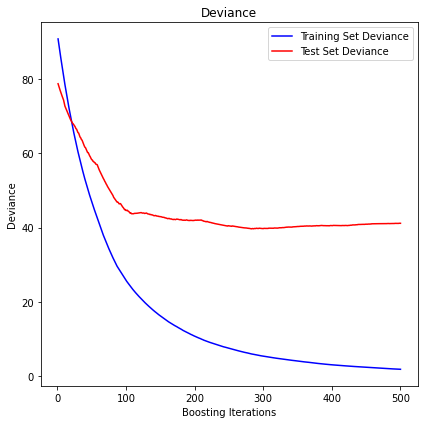

In [80]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

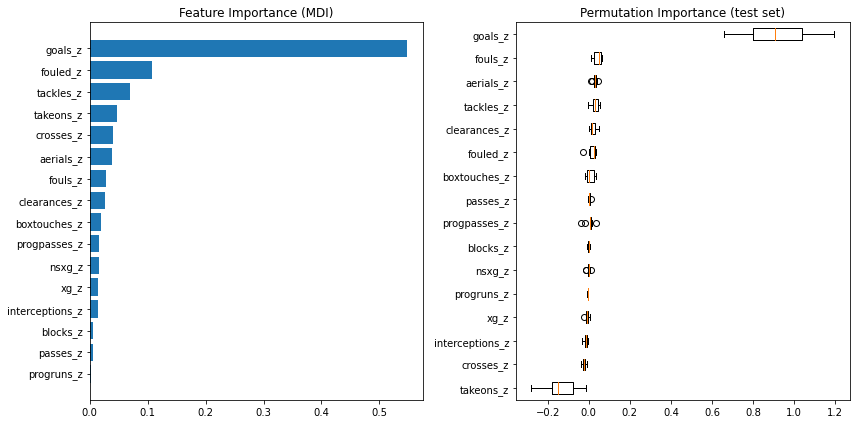

In [81]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

# Decision Forest Regression

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [83]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [84]:
y_pred = regr.predict(X_test)

In [85]:
print('DECISION FOREST REGRESSION')
print('r2 score: '+str(r2_score(y_test, y_pred)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MSE: '+str(mean_squared_error(y_test, y_pred)))
print('MAE: '+str(mean_absolute_error(y_test, y_pred)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

DECISION FOREST REGRESSION
r2 score: 0.5771181675621109
RMSE : 5.788888292265893
MSE: 33.51122766033313
MAE: 4.744589342346552
MAPE: 0.7432507123614697


# Boosted Decision Tree Regression

In [86]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=42
)

In [87]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_train)
y_2 = regr_2.predict(X_train)

Finally, we plot how well our two regressors, single decision tree regressor and AdaBoost regressor, could fit the data.

In [88]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# X_train=np.arange(0,len(X_train),1)

# colors = sns.color_palette("colorblind")

# plt.figure()
# plt.scatter(X_train, y_train, color=colors[0], label="training")
# plt.plot(X_train, y_1, color=colors[1], label="n_estimators=1", linewidth=1)
# plt.plot(X_train, y_2, color=colors[2], label="n_estimators=300", linewidth=1)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Boosted Decision Tree Regression")
# plt.legend()
# plt.show()

# Neural Network Regression

In [89]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [90]:
# regr = MLPRegressor(random_state=1, max_iter=700).fit(X_train, y_train)


In [91]:
regr = MLPRegressor(random_state=1, hidden_layer_sizes=(58), 
                    max_iter=700).fit(X_train, y_train)


/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


In [92]:
regr.predict(X_test[:2])

array([10.4846913, 10.6237257])

In [93]:
regr.score(X_test, y_test)

0.4535084308765823

In [94]:
y_pred = regr.predict(X_test)

In [95]:
print('Neural Network Regression')
print('r2 score: '+str(r2_score(y_test, y_pred)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MSE: '+str(mean_squared_error(y_test, y_pred)))
print('MAE: '+str(mean_absolute_error(y_test, y_pred)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

Neural Network Regression
r2 score: 0.4535084308765823
RMSE : 6.58078024482959
MSE: 43.3066686307394
MAE: 5.276057548150234
MAPE: 0.5775679428367543


Best results is sith hidden_layer_sizes=(58

# Stochastic Gradient Descent Regression

In [96]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [97]:
n_samples, n_features = 10, 5

# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))

In [98]:
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [99]:
reg.predict(X_test)

array([ 9.89340726, 13.1917194 , 15.55633179,  7.50754916, 10.02140029,
       16.35184614, -3.69950173,  6.7746063 , 17.07459281, 20.17032075,
       21.92123995,  7.2108497 , 20.89808977, 16.33898502,  9.69742806,
       19.10697599, 18.76718452, 13.67184118, 11.68172548, 13.67948651,
       19.56386196,  5.37182705,  7.23759558, 18.6150722 , 13.71083586,
       11.5050281 , 15.23530504, 25.84297384])

In [100]:
reg.score(X_test, y_test, sample_weight=None)

0.46245172555797254

In [101]:
pred_train= reg.predict(X_train)

In [102]:
predictions = reg.predict(X_test)

In [103]:
print('Stochastic Gradient Descent Regression')
print('RMSE: '+str(np.sqrt(mean_squared_error(y_train,pred_train))))
print('R Squared: '+str(r2_score(y_train, pred_train)))
print('MSE: '+str(mean_squared_error(y_test, predictions)))
print('MAE: '+str(mean_absolute_error(y_test, predictions)))

Stochastic Gradient Descent Regression
RMSE: 6.672635836353489
R Squared: 0.5168595114757346
MSE: 42.59795815629372
MAE: 5.337918283707794


In [104]:
print('MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

MAPE: 0.5775679428367543


### LINEAR REGRESSION
- RMSE : 6.5489054539688025
- r2 score: 0.45878960350087705
- MSE: 42.88816264502233
- MAE: 5.441647295277558
- MAPE: 0.8581266877876318
--------------

### RIDGE REGRESSION
- RMSE: 6.645452818212983
- R Squared: 0.5207879337372383
- MSE: 42.88816264502233
- MAE: 5.441647295277558
- MAPE: 0.9405473114946074
----------------

### LASSO REGRESSION
- RMSE: 6.654226955476154
- R Squared: 0.5195216699254779
- MSE: 42.88816264502233
- MAE: 5.441647295277558
- MAPE: 0.8581266877876318
---
- RMSE: 6.4986296685245195
- R Squared: 0.4670674244494648
- MSE: 42.232187568627104
- MAE: 5.34439587548745
- MAPE: 0.8234574915992052


---
### ELASTIC NET
- Test set evaluation:
    - RMSE: 6.332901684769903
    - R2 Square 0.4939025125678309
    - MSE: 40.10564374896148
    - MAE: 5.176351828568661
    - MAPE: 0.6772758405894522

- Train set evaluation:
    - RMSE: 6.900145046035427
    - R2 Square 0.48335167350752983
    - MSE: 47.612001656327244   
    - MAE: 5.825735023910361
    - MAPE: 1.1048890675934306

    
__________________________________

### POISSON
- r2 test: 0.3829207110459202
- r2 trian: 0.4061594064996301


- Poisson REGRESSION test
    - RMSE : 6.992881043310523
    - r2 score: 0.3829207110459202
    - MSE: 48.900385285891666
    - MAE: 5.8573098719682894
    - MAPE: 0.880738720808836


-------

### Gradient Boosting regression
- MSE TEST: 41.291555765943784
- MAE TEST: 4.9700608677096065

----

### Stochastic Gradient Descent Regression
- RMSE: 6.664364750268197
- r2 score: 0.5180565256641232
- MSE: 42.77056375122684
- MAE: 5.372601073664727

### DECISION FOREST REGRESSION
- RMSE : 5.788888292265893
- r2 score: 0.5771181675621109
- MSE: 33.51122766033313
- MAE: 4.744589342346552
- MAPE: 0.7432507123614697


### Neural Network Regression
- RMSE : 6.269715984388013
- r2 score: 0.5039511749369979
- MSE: 39.30933852489055
- MAE: 5.104212120461294
- <b>MAPE: 0.5908518807785906</b>


### Neural Network Regression (58 hidden layers)
- r2 score: 0.4535084308765823
- RMSE : 6.58078024482959
- MSE: 43.3066686307394
- MAE: 5.276057548150234
- <b>MAPE: 0.5775679428367543</b>




- R Square - <b>value is between 0 to 1 and a bigger value indicates a better fit</b> between prediction and actual value.
- MSE - <b>An ideal Mean Squared Error (MSE) value is 0.0,</b> which means that all predicted values matched the expected values exactly. MSE gives larger penalization to big prediction error by square it while MAE treats all errors the same.
- RMSE - Based on a rule of thumb, it can be said that <b>RMSE values between 0.2 and 0.5 </b>shows that the model can relatively predict the data accurately. In addition, <b>Adjusted R-squared more than 0.75 is a very good</b> value for showing the accuracy. In some cases, Adjusted R-squared of 0.4 or more is acceptable as well.
- MAE - <b>The lower the MAE score the better.</b> This is because MAE is a measure of the average error between the predictions and intended targets, thus we want to minimise this value.


- There is no ideal value for MAE as it is returned on the same scale that you are predicting, so an ideal MAE value for one dataset will not be the same for another.
- MAE cannot be compared across different models and datasets. However, by converting MAE to MAPE (Mean Absolute Percentage Error), it becomes possible to compare model performance as this error is returned as a percentage.


- https://stephenallwright.com/good-mae-score/
- https://stephenallwright.com/good-mape-score/